In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
df = pd.read_csv('Desktop\Final Project\webserver.csv')
df.head()

,No.,Time,Source,Destination,Protocol,Length,Source Port,Dest Port,Status Code,Flags,Arrival Time,Info
0,131,69.468422,138.68.92.163,134.122.33.221,TCP,56,46086,80,NaN,0x010,"Feb 19, 2022 21:58:12.322138000 Eastern Standa...",46086 > 80 [ACK] Seq=1 Ack=1 Win=1024 Len=0
1,132,69.468469,134.122.33.221,138.68.92.163,TCP,56,80,46086,NaN,0x004,"Feb 19, 2022 21:58:12.322185000 Eastern Standa...",80 > 46086 [RST] Seq=1 Win=0 Len=0
2,133,69.469135,138.68.92.163,134.122.33.221,TCP,60,46086,443,NaN,0x002,"Feb 19, 2022 21:58:12.322851000 Eastern Standa...",46086 > 443 [SYN] Seq=0 Win=1024 Len=0 MSS=1460
3,134,69.469145,134.122.33.221,138.68.92.163,TCP,56,443,46086,NaN,0x014,"Feb 19, 2022 21:58:12.322861000 Eastern Standa...","443 > 46086 [RST, ACK] Seq=1 Ack=1 Win=0 Len=0"
4,135,69.704653,138.68.92.163,134.122.33.221,TCP,60,46342,5900,NaN,0x002,"Feb 19, 2022 21:58:12.558369000 Eastern Standa...",46342 > 5900 [SYN] Seq=0 Win=1024 Len=0 MSS=...


Sort information by attacker's IP

In [10]:
df_ip = df[df.Source == '138.68.92.163']
df_ip

,No.,Time,Source,Destination,Protocol,Length,Source Port,Dest Port,Status Code,Flags,Arrival Time,Info
0,131,69.468422,138.68.92.163,134.122.33.221,TCP,56,46086,80,NaN,0x010,"Feb 19, 2022 21:58:12.322138000 Eastern Standa...",46086 > 80 [ACK] Seq=1 Ack=1 Win=1024 Len=0
2,133,69.469135,138.68.92.163,134.122.33.221,TCP,60,46086,443,NaN,0x002,"Feb 19, 2022 21:58:12.322851000 Eastern Standa...",46086 > 443 [SYN] Seq=0 Win=1024 Len=0 MSS=1460
4,135,69.704653,138.68.92.163,134.122.33.221,TCP,60,46342,5900,NaN,0x002,"Feb 19, 2022 21:58:12.558369000 Eastern Standa...",46342 > 5900 [SYN] Seq=0 Win=1024 Len=0 MSS=...
5,136,69.704653,138.68.92.163,134.122.33.221,TCP,60,46342,139,NaN,0x002,"Feb 19, 2022 21:58:12.558369000 Eastern Standa...",46342 > 139 [SYN] Seq=0 Win=1024 Len=0 MSS=1460
6,137,69.704653,138.68.92.163,134.122.33.221,TCP,60,46342,587,NaN,0x002,"Feb 19, 2022 21:58:12.558369000 Eastern Standa...",46342 > 587 [SYN] Seq=0 Win=1024 Len=0 MSS=1460
...,...,...,...,...,...,...,...,...,...,...,...,...
918,6790,341.891457,138.68.92.163,134.122.33.221,TCP,73,4444,55866,NaN,0x018,"Feb 19, 2022 22:02:44.745173000 Eastern Standa...","4444 > 55866 [PSH, ACK] Seq=541 Ack=73807 Wi..."
921,6793,341.994136,138.68.92.163,134.122.33.221,TCP,68,4444,55866,NaN,0x011,"Feb 19, 2022 22:02:44.847852000 Eastern Standa...","4444 > 55866 [FIN, ACK] Seq=546 Ack=73808 Wi..."
923,6795,341.994828,138.68.92.163,134.122.33.221,TCP,68,54950,80,NaN,0x010,"Feb 19, 2022 22:02:44.848544000 Eastern Standa...",54950 > 80 [ACK] Seq=522 Ack=2656 Win=63616 ...
924,6796,341.995313,138.68.92.163,134.122.33.221,TCP,68,54950,80,NaN,0x011,"Feb 19, 2022 22:02:44.849029000 Eastern Standa...","54950 > 80 [FIN, ACK] Seq=522 Ack=2656 Win=6..."


Convert flag's numbers to understandable format

In [5]:
df['Flags'] = df['Flags'].replace({'0x002': 'SYN', '0x004': 'RST', '0x010': 'ACK', '0x011': 'FIN ACK', '0x012': 'SYN ACK', '0x014': 'RST ACK', '0x018': 'PSH ACK'})
df

,No.,Time,Source,Destination,Protocol,Length,Source Port,Dest Port,Status Code,Flags,Arrival Time,Info
0,131,69.468422,138.68.92.163,134.122.33.221,TCP,56,46086,80,NaN,ACK,"Feb 19, 2022 21:58:12.322138000 Eastern Standa...",46086 > 80 [ACK] Seq=1 Ack=1 Win=1024 Len=0
1,132,69.468469,134.122.33.221,138.68.92.163,TCP,56,80,46086,NaN,RST,"Feb 19, 2022 21:58:12.322185000 Eastern Standa...",80 > 46086 [RST] Seq=1 Win=0 Len=0
2,133,69.469135,138.68.92.163,134.122.33.221,TCP,60,46086,443,NaN,SYN,"Feb 19, 2022 21:58:12.322851000 Eastern Standa...",46086 > 443 [SYN] Seq=0 Win=1024 Len=0 MSS=1460
3,134,69.469145,134.122.33.221,138.68.92.163,TCP,56,443,46086,NaN,RST ACK,"Feb 19, 2022 21:58:12.322861000 Eastern Standa...","443 > 46086 [RST, ACK] Seq=1 Ack=1 Win=0 Len=0"
4,135,69.704653,138.68.92.163,134.122.33.221,TCP,60,46342,5900,NaN,SYN,"Feb 19, 2022 21:58:12.558369000 Eastern Standa...",46342 > 5900 [SYN] Seq=0 Win=1024 Len=0 MSS=...
...,...,...,...,...,...,...,...,...,...,...,...,...
922,6794,341.994184,134.122.33.221,138.68.92.163,TCP,68,55866,4444,NaN,ACK,"Feb 19, 2022 22:02:44.847900000 Eastern Standa...",55866 > 4444 [ACK] Seq=73808 Ack=547 Win=642...
923,6795,341.994828,138.68.92.163,134.122.33.221,TCP,68,54950,80,NaN,ACK,"Feb 19, 2022 22:02:44.848544000 Eastern Standa...",54950 > 80 [ACK] Seq=522 Ack=2656 Win=63616 ...
924,6796,341.995313,138.68.92.163,134.122.33.221,TCP,68,54950,80,NaN,FIN ACK,"Feb 19, 2022 22:02:44.849029000 Eastern Standa...","54950 > 80 [FIN, ACK] Seq=522 Ack=2656 Win=6..."
925,6797,341.995425,134.122.33.221,138.68.92.163,TCP,68,80,54950,NaN,FIN ACK,"Feb 19, 2022 22:02:44.849141000 Eastern Standa...","80 > 54950 [FIN, ACK] Seq=2656 Ack=523 Win=6..."


In [6]:
df_protocol = df_ip.groupby('Protocol').Source.count()
df_protocol.reset_index()

,Protocol,Source
0,HTTP,191
1,TCP,295


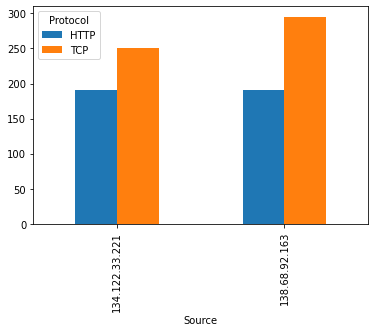

In [35]:
df.groupby('Source')['Protocol'].value_counts().unstack().plot(kind='bar');

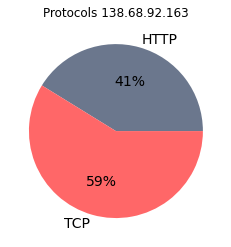

In [36]:
plot_protocol = df.groupby('Protocol').size().plot(kind='pie', 
                                   title='Protocols 138.68.92.163', 
                                   autopct='%1.0f%%', 
                                   colors = ['#6b778d', '#ff6768'], 
                                   fontsize=14);
plot_protocol.set_ylabel('');

Sorts and counts by used ports 

In [8]:
df_srcport = df_ip.groupby('Source Port').Source.count()
df_srcport.sort_values(ascending=False).reset_index()

,Source Port,Source
0,4444,165
1,54944,107
2,46342,102
3,54946,95
4,54950,9
5,54948,6
6,46086,2


In [9]:
df_dstport = df_ip.groupby('Dest Port').Source.count()
df_dstport.sort_values(ascending=False).reset_index()

,Dest Port,Source
0,80,220
1,55866,165
2,443,2
3,22,2
4,554,1
...,...,...
96,5051,1
97,5060,1
98,5101,1
99,5190,1


In [10]:
df_dstport.sum()

486

In [11]:
df_flags = df.groupby('Flags').Source.count().sort_values(ascending=False)
df_flags.reset_index()

,Flags,Source
0,PSH ACK,520
1,ACK,182
2,SYN,106
3,RST ACK,99
4,FIN ACK,10
5,SYN ACK,7
6,RST,3


In [32]:
df[df['Source'] == '138.68.92.163'].groupby('Flags')['Protocol'].value_counts()

Flags    Protocol
ACK      TCP         142
FIN ACK  TCP           5
PSH ACK  HTTP        191
         TCP          40
RST      TCP           2
SYN      TCP         105
SYN ACK  TCP           1
Name: Protocol, dtype: int64

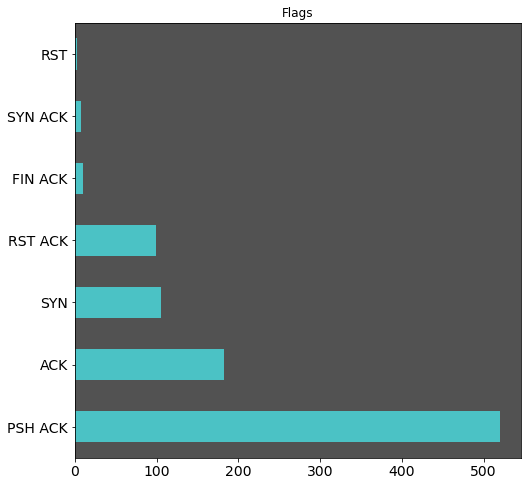

In [17]:
plot_flags = df_flags.plot(kind='barh', figsize=(8,8), title='Flags', fontsize=14, color='#4bc2c5')
plot_flags.set_ylabel('')
plot_flags.set_facecolor('#525252')

Server's requests

In [13]:
df_status = df.groupby('Status Code').Source.count().sort_values(ascending=False)
df_status.reset_index()

,Status Code,Source
0,404.0,186
1,200.0,4
2,301.0,1
